# Regesi menggunakan Regresi Linier

Notebook ini merupakan bagian dari buku **Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **BAB VII - REGRESI LINIER**

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

## Data Understanding

In [2]:
# Membaca data dari file CSV
df = pd.read_csv(r'../datasets/boston-housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
# Menampilkan statistik deskriptif dari data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Menampilkan sampel 5 data teratas
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

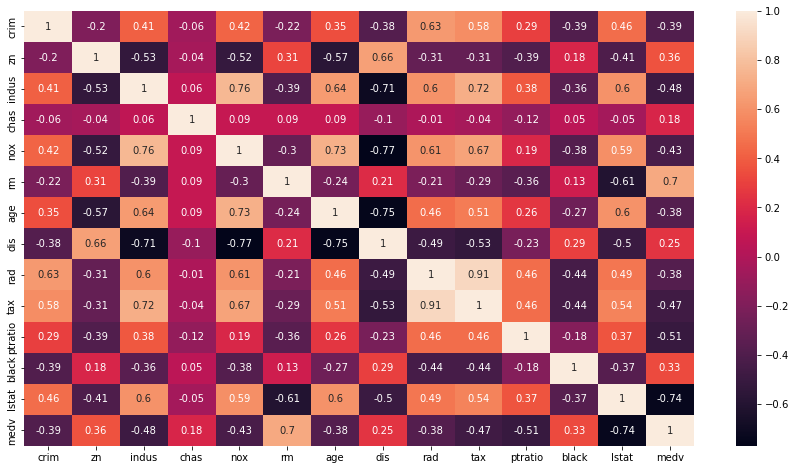

In [5]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr().round(2), annot=True)

<AxesSubplot:xlabel='medv', ylabel='Count'>

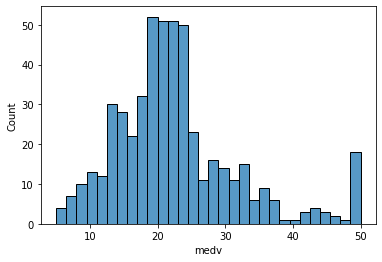

In [6]:
# Distribution plot
sns.histplot(df['medv'], bins=30)

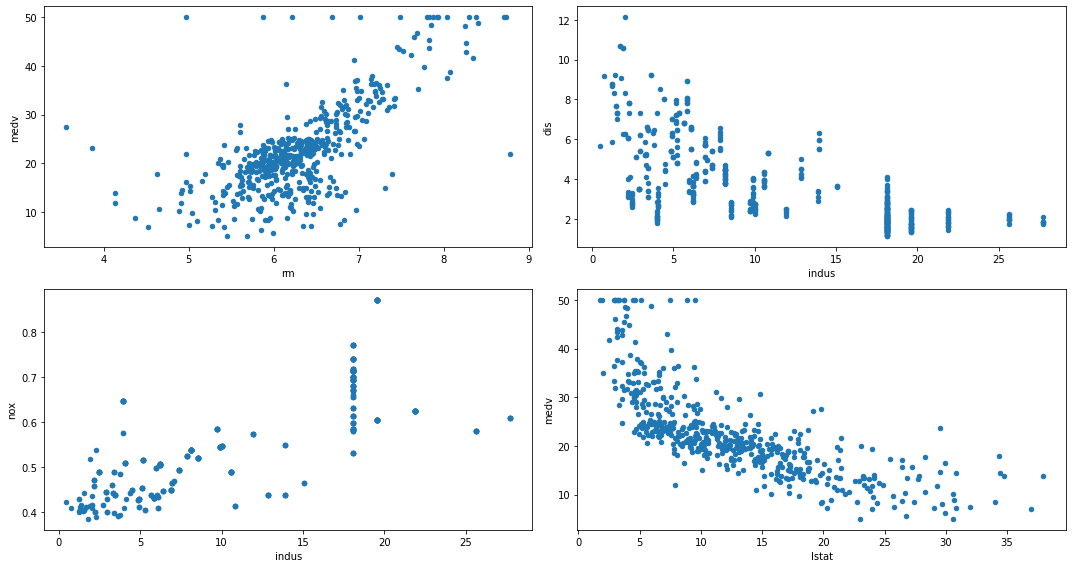

In [7]:
# Scatter
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

df.plot.scatter(x='rm', y='medv', ax=axes[0, 0])
df.plot.scatter(x='indus', y='dis', ax=axes[0, 1])
df.plot.scatter(x='indus', y='nox', ax=axes[1, 0])
df.plot.scatter(x='lstat', y='medv', ax=axes[1, 1])

plt.tight_layout()

## Data Preparation

In [8]:
# Memisahkan features dan label
X = df[["rm", "lstat"]].values
y = df.iloc[:, -1].values

In [9]:
# Bagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

## Modelling

In [10]:
# Membuat model dengan data latih
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [11]:
# Melakukan prediksi dan menampilkan statistik
y_pred = regressor.predict(X_test)

print("Intercept:", regressor.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

f, p = f_regression(X_train, y_train)
pd.DataFrame({
    "Variable": ["rm", "lstat"],
    "Cofficient": np.round(regressor.coef_, 4),
    "F-test": np.round(f, 4),
    "P-value": np.round(p, 4)
})

Intercept: -2.5372467189439867
MAE: 3.9950377587004207
MSE: 32.72507169281496
MAPE: 0.21870947348906752
R2: 0.6069792285352371


,Variable,Cofficient,F-test,P-value
0,rm,5.2735,355.7507,0.0
1,lstat,-0.6418,434.5536,0.0


<AxesSubplot:xlabel='rm', ylabel='medv'>

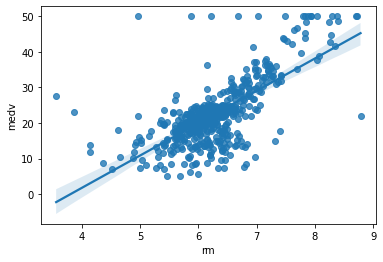

In [12]:
# Membuat plot
sns.regplot(data=df, x="rm", y="medv")

In [13]:
# Melakukan prediksi dari data baru
input_pred = [
    [6.575, 4.98],  # y=24.0
    [6.421, 9.14]  # y=21.0
]

regressor.predict(input_pred)

array([28.93973222, 25.45759587])

## Persistance

In [14]:
# Simpan model
import joblib
joblib.dump(regressor, "../model/housing.joblib")

['../model/housing.joblib']